# Housing Agency in Boston MA

## Objetivos

•	¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no?

•	¿Existe una diferencia en los valores medianos de las casas de cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940?

•	¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres de negocios no minoristas por ciudad?

•	¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios?


<h1 id="Adquisicion de Datos">Adquisicion de Datos</h1>
<p>
Hay varios formatos para un conjunto de datos, .csv, .json, .xlsx, etc. El conjunto de datos se puede almacenar en diferentes lugares, en su máquina local o, a veces, en línea.<br>
En nuestro caso, el conjunto de datos de hogares es una fuente en línea y está en formato CSV (valores separados por comas). Usemos este conjunto de datos como ejemplo para practicar la lectura de datos.
<ul>
    <li>Ubicacion de los datos: <a href="'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'" target="_blank">https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv</a></li>
    <li>Tipo de datos: csv</li>
</ul>
La biblioteca Pandas es una herramienta útil que nos permite leer varios conjuntos de datos en un marco de datos; Nuestras plataformas de portátiles Jupyter tienen una <b>Biblioteca Pandas</b> incorporada, por lo que todo lo que necesitamos hacer es importar Pandas sin instalarlo. Si ejecuta este portátil en un entorno diferente, p. su escritorio, es posible que necesite descomentar e instalar Pandas o Numpy.
</p>

In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# importar librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

<h2>Leer datos</h2>
<p>
Usamos la función <code>pandas.read_csv()</code> para leer el archivo csv. Entre paréntesis, ponemos la ruta del archivo junto con una comilla, para que pandas lea el archivo en un marco de datos desde esa dirección. La ruta del archivo puede ser una URL o la dirección de su archivo local.<br>
Debido a que los datos no incluyen encabezados, podemos agregar un argumento <code>headers = None</code> dentro del método <code>read_csv()</code>, de modo que pandas no establezca automáticamente la primera fila como encabezado. .<br>
También puede asignar el conjunto de datos a cualquier variable que cree.
</p>

In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv"
resp = await fetch(URL)
other_path = io.BytesIO((await resp.arrayBuffer()).to_py())


In [4]:
# Lea el archivo en línea mediante la URL proporcionada arriba y asígnelo a la variable "df"
df = pd.read_csv(other_path, header=0)

Después de leer el conjunto de datos, podemos usar el método <code>dataframe.head(n)</code> para verificar las n primeras filas del marco de datos; donde n es un número entero. Al contrario de <code>dataframe.head(n)</code>, <code>dataframe.tail(n)</code> le mostrará las n filas inferiores del marco de datos.

In [5]:
# anulo la primer columna que no tiene datos relevantes
df = df.drop(df.columns[0], axis=1)

# mostrar las primeras 5 filas usando el método dataframe.head()
print("las primeras 5 filas del dataframe") 
df.head(5)


las primeras 5 filas del dataframe


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Generar visualizaciones y estadísticas descriptivas

<h3>Genere lo siguiente y explique sus hallazgos:</h3>
<p>
1•	Para el "valor medio de las viviendas ocupadas por sus propietarios", diagrama de caja<br>
2•	Proporcione un   diagrama de barras para la variable del río Charles.<br>
3•	Proporcione un diagrama de caja para la variable MEDV frente a la variable EDAD. (Discretiza la variable edad en tres grupos de 35 años y menos, entre 35 y 70 años y 70 años y más)<br>
4•	Proporcione un diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico y la proporción de acres de negocios no minoristas por ciudad. ¿Qué puedes <br>decir sobre la relación?
5•	Crear un histograma para la variable de proporción de alumnos por maestro<br>
</p>

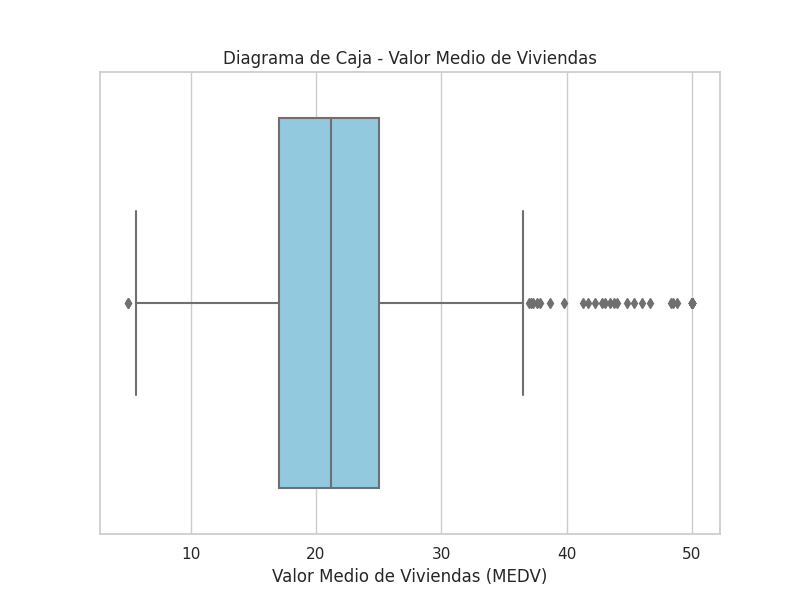

In [6]:
# 1• Para el "valor medio de las viviendas ocupadas por sus propietarios", proporcione un diagrama de caja

# Utiliza Seaborn para crear el diagrama de caja
sns.set(style="whitegrid")  # Estilo del gráfico

# Crea el diagrama de caja
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x='MEDV', data=df, color='skyblue')  # 'MEDV' es la columna que deseas visualizar

# Personaliza el gráfico
plt.title("Diagrama de Caja - Valor Medio de Viviendas")
plt.xlabel("Valor Medio de Viviendas (MEDV)")

# Muestra el gráfico
plt.show()

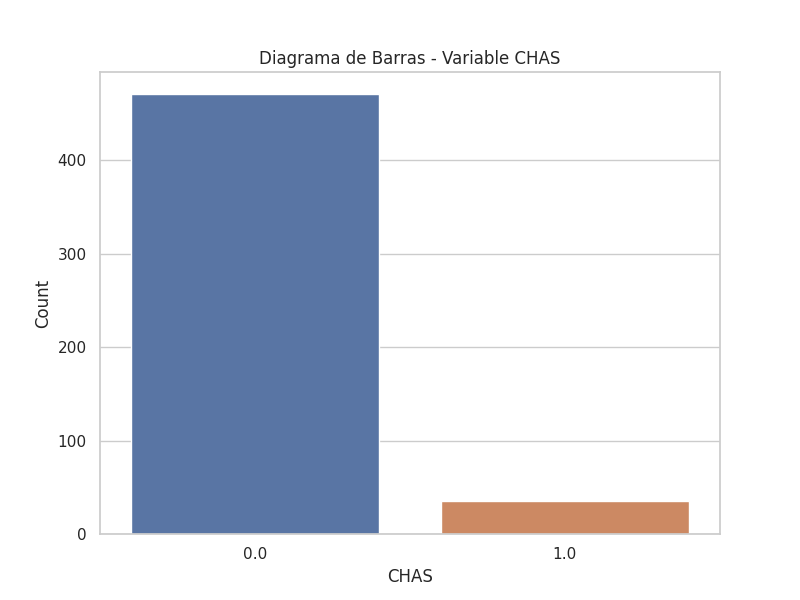

In [8]:
# 2• Proporcione un diagrama de barras para la variable del río Charles.
sns.countplot(x='CHAS', data=df)
plt.title("Diagrama de Barras - Variable CHAS")
plt.xlabel("CHAS")
plt.ylabel("Count")
plt.show()

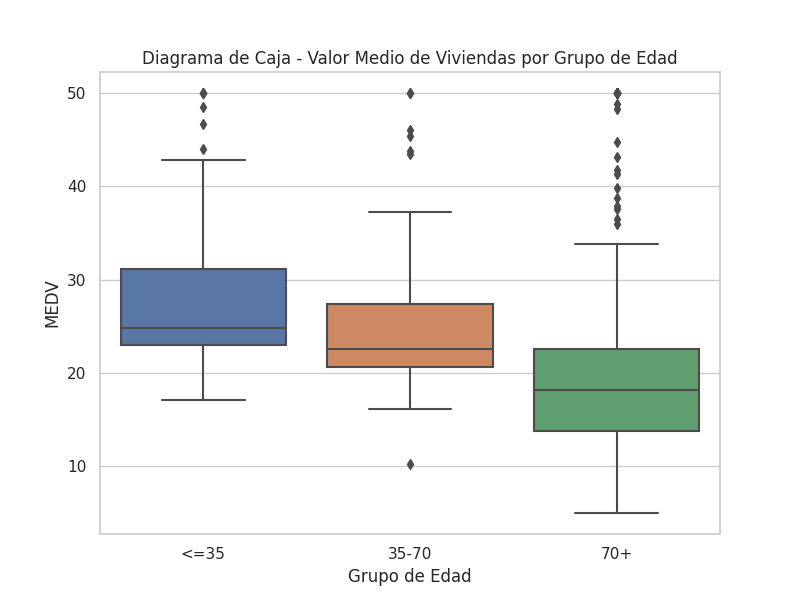

In [12]:
# 3• Proporcione un diagrama de caja para la variable MEDV frente a la variable EDAD.
# Discretiza la variable EDAD en tres grupos
bins = [0, 35, 70, max(df['AGE'])]
labels = ['<=35', '35-70', '70+']
df['AGE_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels)

sns.boxplot(x='AGE_Group', y='MEDV', data=df)
plt.title("Diagrama de Caja - Valor Medio de Viviendas por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("MEDV")
plt.show()


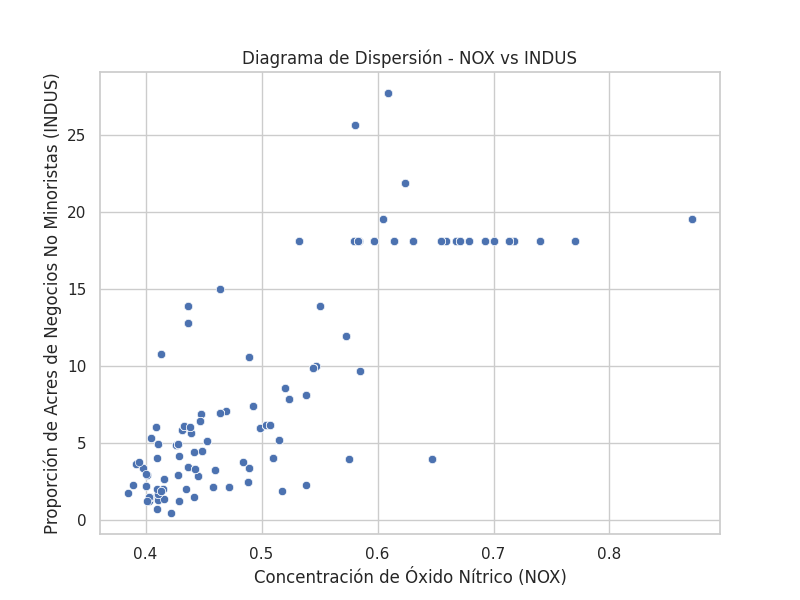

In [14]:
# 4• Proporcione un diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico
# y la proporción de acres de negocios no minoristas por ciudad.
sns.scatterplot(x='NOX', y='INDUS', data=df)
plt.title("Diagrama de Dispersión - NOX vs INDUS")
plt.xlabel("Concentración de Óxido Nítrico (NOX)")
plt.ylabel("Proporción de Acres de Negocios No Minoristas (INDUS)")
plt.show()


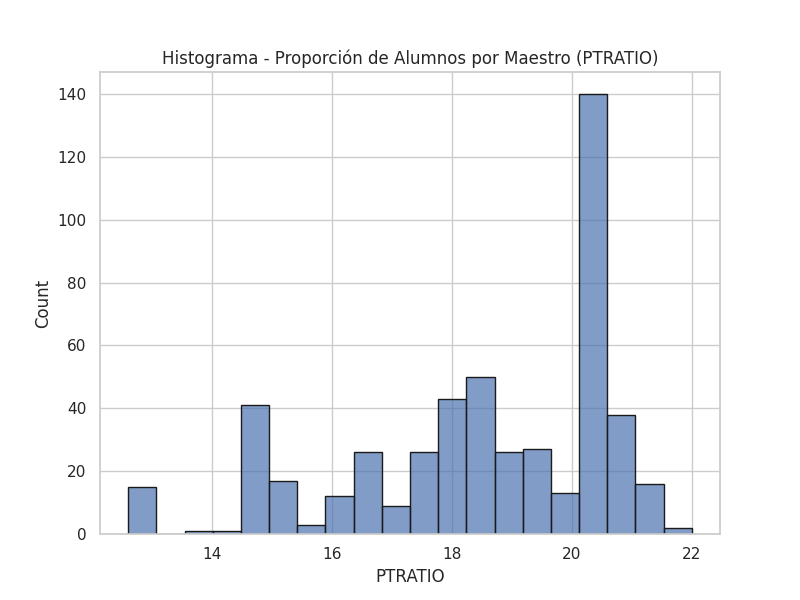

In [17]:
# 5• Crear un histograma para la variable de proporción de alumnos por maestro
sns.histplot(df['PTRATIO'], bins=20, edgecolor='k', alpha=0.7)
plt.title("Histograma - Proporción de Alumnos por Maestro (PTRATIO)")
plt.xlabel("PTRATIO")
plt.ylabel("Count")
plt.show()

<p>
1•	¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)<br>
2•	¿Existe una diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)<br>
3•	¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres de negocios no minoristas por ciudad? (Correlación de Pearson)<br>
4•	¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)<br>
    
 **Asegurando de:**
1.	Expresar tu hipótesis.
2.	Utilizando α = 0,05
3.	Realizando la prueba Estadísticas.
4.	Indiquecar la conclusión de la prueba.
</p>

In [22]:
# 1• ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)
import scipy.stats as stats

# Dividir el conjunto de datos en dos grupos según la variable CHAS
group_1 = df[df['CHAS'] == 0]['MEDV']
group_2 = df[df['CHAS'] == 1]['MEDV']

# Realizar una prueba t para muestras independientes
t_statistic, p_value = stats.ttest_ind(group_1, group_2)

# Comprobar el valor de p para determinar si hay una diferencia significativa
if p_value < 0.05:
    print("Hay una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.", p_value )
else:
    print("No hay una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.". p_value)

Hay una diferencia significativa en el valor medio de las casas delimitadas por el río Charles. 7.390623170519905e-05


In [23]:
# 2• ¿Existe una diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Realizar un análisis de varianza (ANOVA)
model = ols('MEDV ~ AGE', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Comprobar la significancia de la variable AGE
if anova_table['PR(>F)']['AGE'] < 0.05:
    print("Existe al menos una diferencia significativa en los valores medios de las casas para diferentes grupos de AGE.",anova_table['PR(>F)']['AGE'] )
else:
    print("No existe una diferencia significativa en los valores medios de las casas para diferentes grupos de AGE.",anova_table['PR(>F)']['AGE'])


Existe al menos una diferencia significativa en los valores medios de las casas para diferentes grupos de AGE. 1.5699822091881306e-18


In [24]:
# 3• ¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres de negocios no minoristas por ciudad? (Correlación de Pearson)
# Calcular el coeficiente de correlación de Pearson
correlation_coefficient = df['NOX'].corr(df['INDUS'])

# Comprobar la significancia de la correlación
if abs(correlation_coefficient) < 0.05:
    print("No existe una correlación significativa entre las concentraciones de óxido nítrico y la proporción de acres de negocios no minoristas por ciudad.",abs(correlation_coefficient))
else:
    print("Existe una correlación significativa entre las concentraciones de óxido nítrico y la proporción de acres de negocios no minoristas por ciudad.",abs(correlation_coefficient))


Existe una correlación significativa entre las concentraciones de óxido nítrico y la proporción de acres de negocios no minoristas por ciudad. 0.763651446920914


In [26]:
# 4• ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)
import statsmodels.api as sm

# Definir las variables dependiente e independiente
X = df['DIS']
y = df['MEDV']

# Añadir una constante (intercept) al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir los resultados del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        16:07:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

## Autor

[Alejandro A Diaz](https://www.linkedin.com/in/alejandro-d%C3%ADaz-178286239/)

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2023-09-09        | 1.0     |Alenjandro Diaz  | Converted initial version to Jupyterlite|


<hr>

## <h3 align="center"> Dev Independiente 2023. All rights reserved. <h3/>